# Model training with pycaret

In [4]:
#Import libraries
#!pip install pycaret
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#Import simple regression from pycaret
from pycaret.regression import *

### Model experiment N° 1

In [6]:
s1 = setup(data, target = 'charges', session_id = 123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [7]:
#Creating the model for the first setup
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4222.9616,33775764.3432,5811.6920,0.7983,0.4879,0.4328
1,4522.5819,43620030.5192,6604.5462,0.7464,0.5473,0.4216
2,3853.0378,31981107.9602,5655.1842,0.5951,0.7108,0.4398
3,3707.7705,26513348.5760,5149.1114,0.7786,0.4891,0.5164
4,4484.2122,43828444.1000,6620.3054,0.6740,0.5761,0.3847
5,4113.6222,35882341.9810,5990.1871,0.7692,0.5464,0.4130
6,4098.0868,39631320.0598,6295.3411,0.7303,0.5745,0.4266
7,4833.7747,45739275.7172,6763.0818,0.7485,0.5887,0.3967
8,4621.0616,40681916.3737,6378.2377,0.7372,0.7032,0.5225


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

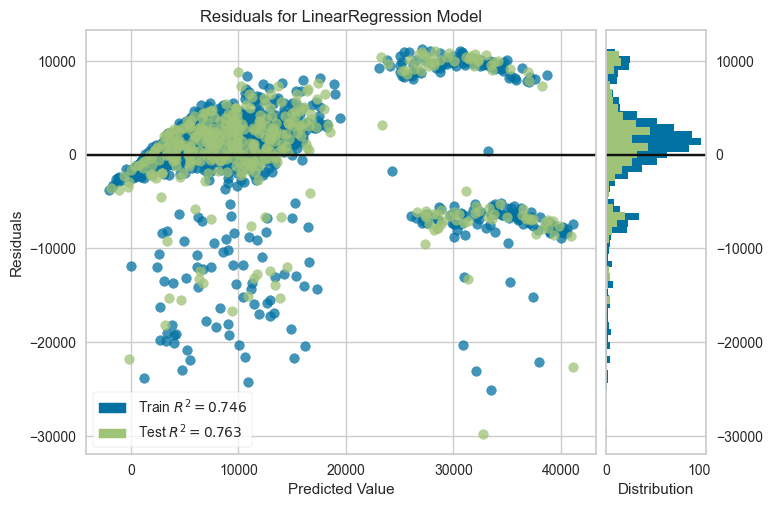

In [8]:
#Plotting the model results
plot_model(lr)

### Model experiment N° 2

In [9]:
s2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 55)"
5,Transformed train set shape,"(936, 55)"
6,Transformed test set shape,"(402, 55)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [11]:
# Running the model
lr2 = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2991.5619,21497604.0046,4636.5509,0.8716,0.3845,0.3058
1,3362.0283,32783666.3318,5725.7023,0.8094,0.4375,0.2992
2,3112.8781,23012473.4844,4797.1318,0.7086,0.5034,0.3925
3,2897.4923,20071443.5502,4480.1165,0.8324,0.4541,0.3889
4,3126.6686,28207812.5265,5311.1028,0.7902,0.5000,0.2972
5,3119.2827,23988709.6032,4897.8270,0.8457,0.5430,0.3043
6,2767.1410,22097397.8721,4700.7869,0.8496,0.3693,0.2920
7,3415.9016,30022619.0796,5479.2900,0.8349,0.4554,0.2901
8,3306.8416,25501816.1786,5049.9323,0.8353,0.4208,0.3625


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

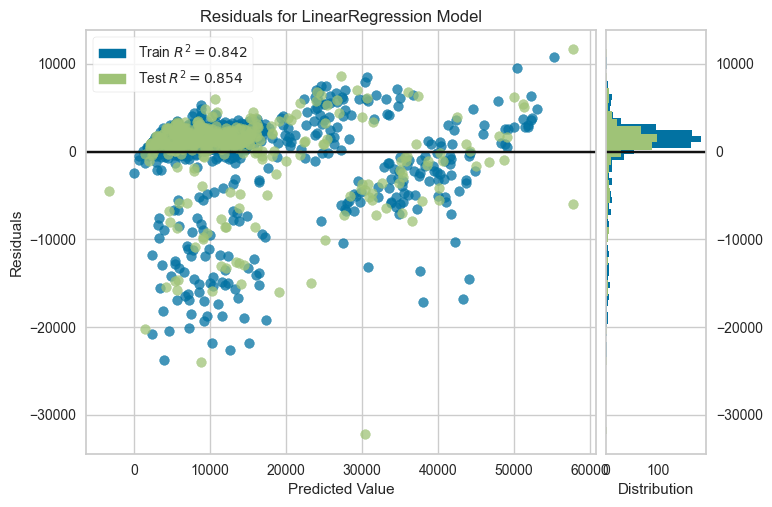

In [12]:
#Plotting model lr2 results
plot_model(lr2)

In [13]:
save_model(lr, 'deployment_20250606')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                 ('onehot_encoding',
                  TransformerWrapper(include=['region'],
                                     transformer=OneHotEncoder(cols=['region'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('polynomial_features',
                  Transformer

In [14]:
deployment_20250606 = load_model('deployment_20250606')

Transformation Pipeline and Model Successfully Loaded


In [15]:
deployment_20250606

Pipeline(memory=FastMemory(location=C:\Users\User\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWr...
                ('onehot_encoding',
                 TransformerWrapper(include=['region'],
                                    transformer=OneHotEncoder(cols=['region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('polynomial_features',
                 TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('trained_model', LinearRegression(n_jobs=-1))])